In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
np.random.seed(0)
random.seed(0)

<Figure size 640x480 with 0 Axes>

In [ ]:
## leemos el conjunto de datos

df = pd.read_csv('loan.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
##  transformar la columna loan status a 0 y 1.

df['loan_status'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)

df_raw = df.copy()

In [ ]:
## de entrada se elimjian estas que el usario no conoce cuando se inicia el prestamo y otras no aportan información relevante

df = df.drop(labels=['total_pymnt','total_pymnt_inv', 'out_prncp','out_prncp_inv', 'funded_amnt_inv',
                   'funded_amnt', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
                   'collection_recovery_fee', 'last_pymnt_amnt', 'total_rec_int', 'last_credit_pull_d', 'url', 'member_id', 'policy_code', 'last_pymnt_d','desc', 'title','zip_code', 'addr_state','id'], axis=1)





In [ ]:


## variables con más del 20%  de datos faltantes no se consideran

total_na=df.isna().sum()
# Identificar las columnas con más del 20% de valores nulos
missing_values = df.isnull().mean()
columns_to_drop = missing_values[missing_values > 0.2].index
df = df.drop(columns=columns_to_drop)
print(missing_values)
print("To drop:")
print(columns_to_drop)









loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057993
emp_length                     0.050514
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000033
earliest_cr_line               0.000033
inq_last_6mths                 0.000033
mths_since_last_delinq         0.511971
mths_since_last_record         0.845553
open_acc                       0.000033
pub_rec                        0.000033
revol_bal                      0.000000
revol_util                     0.000566


La columna eliminada más cercana al umbral de eliminación es next_pymnt_d que es es la próxima fecha de pago, una variable que no aportaría en el target del modelo así y que las demás variables a eliminar poseen demasiados datos faltantes. Por estas razones se considera que depurar estos datos es una buena estrategia que no afectaría al modelo.

In [ ]:
df.head() ## van 30 columnas

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,13648.0,83.7,9.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1687.0,9.4,4.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,2956.0,98.5,10.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,5598.0,21.0,37.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,27783.0,53.9,38.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


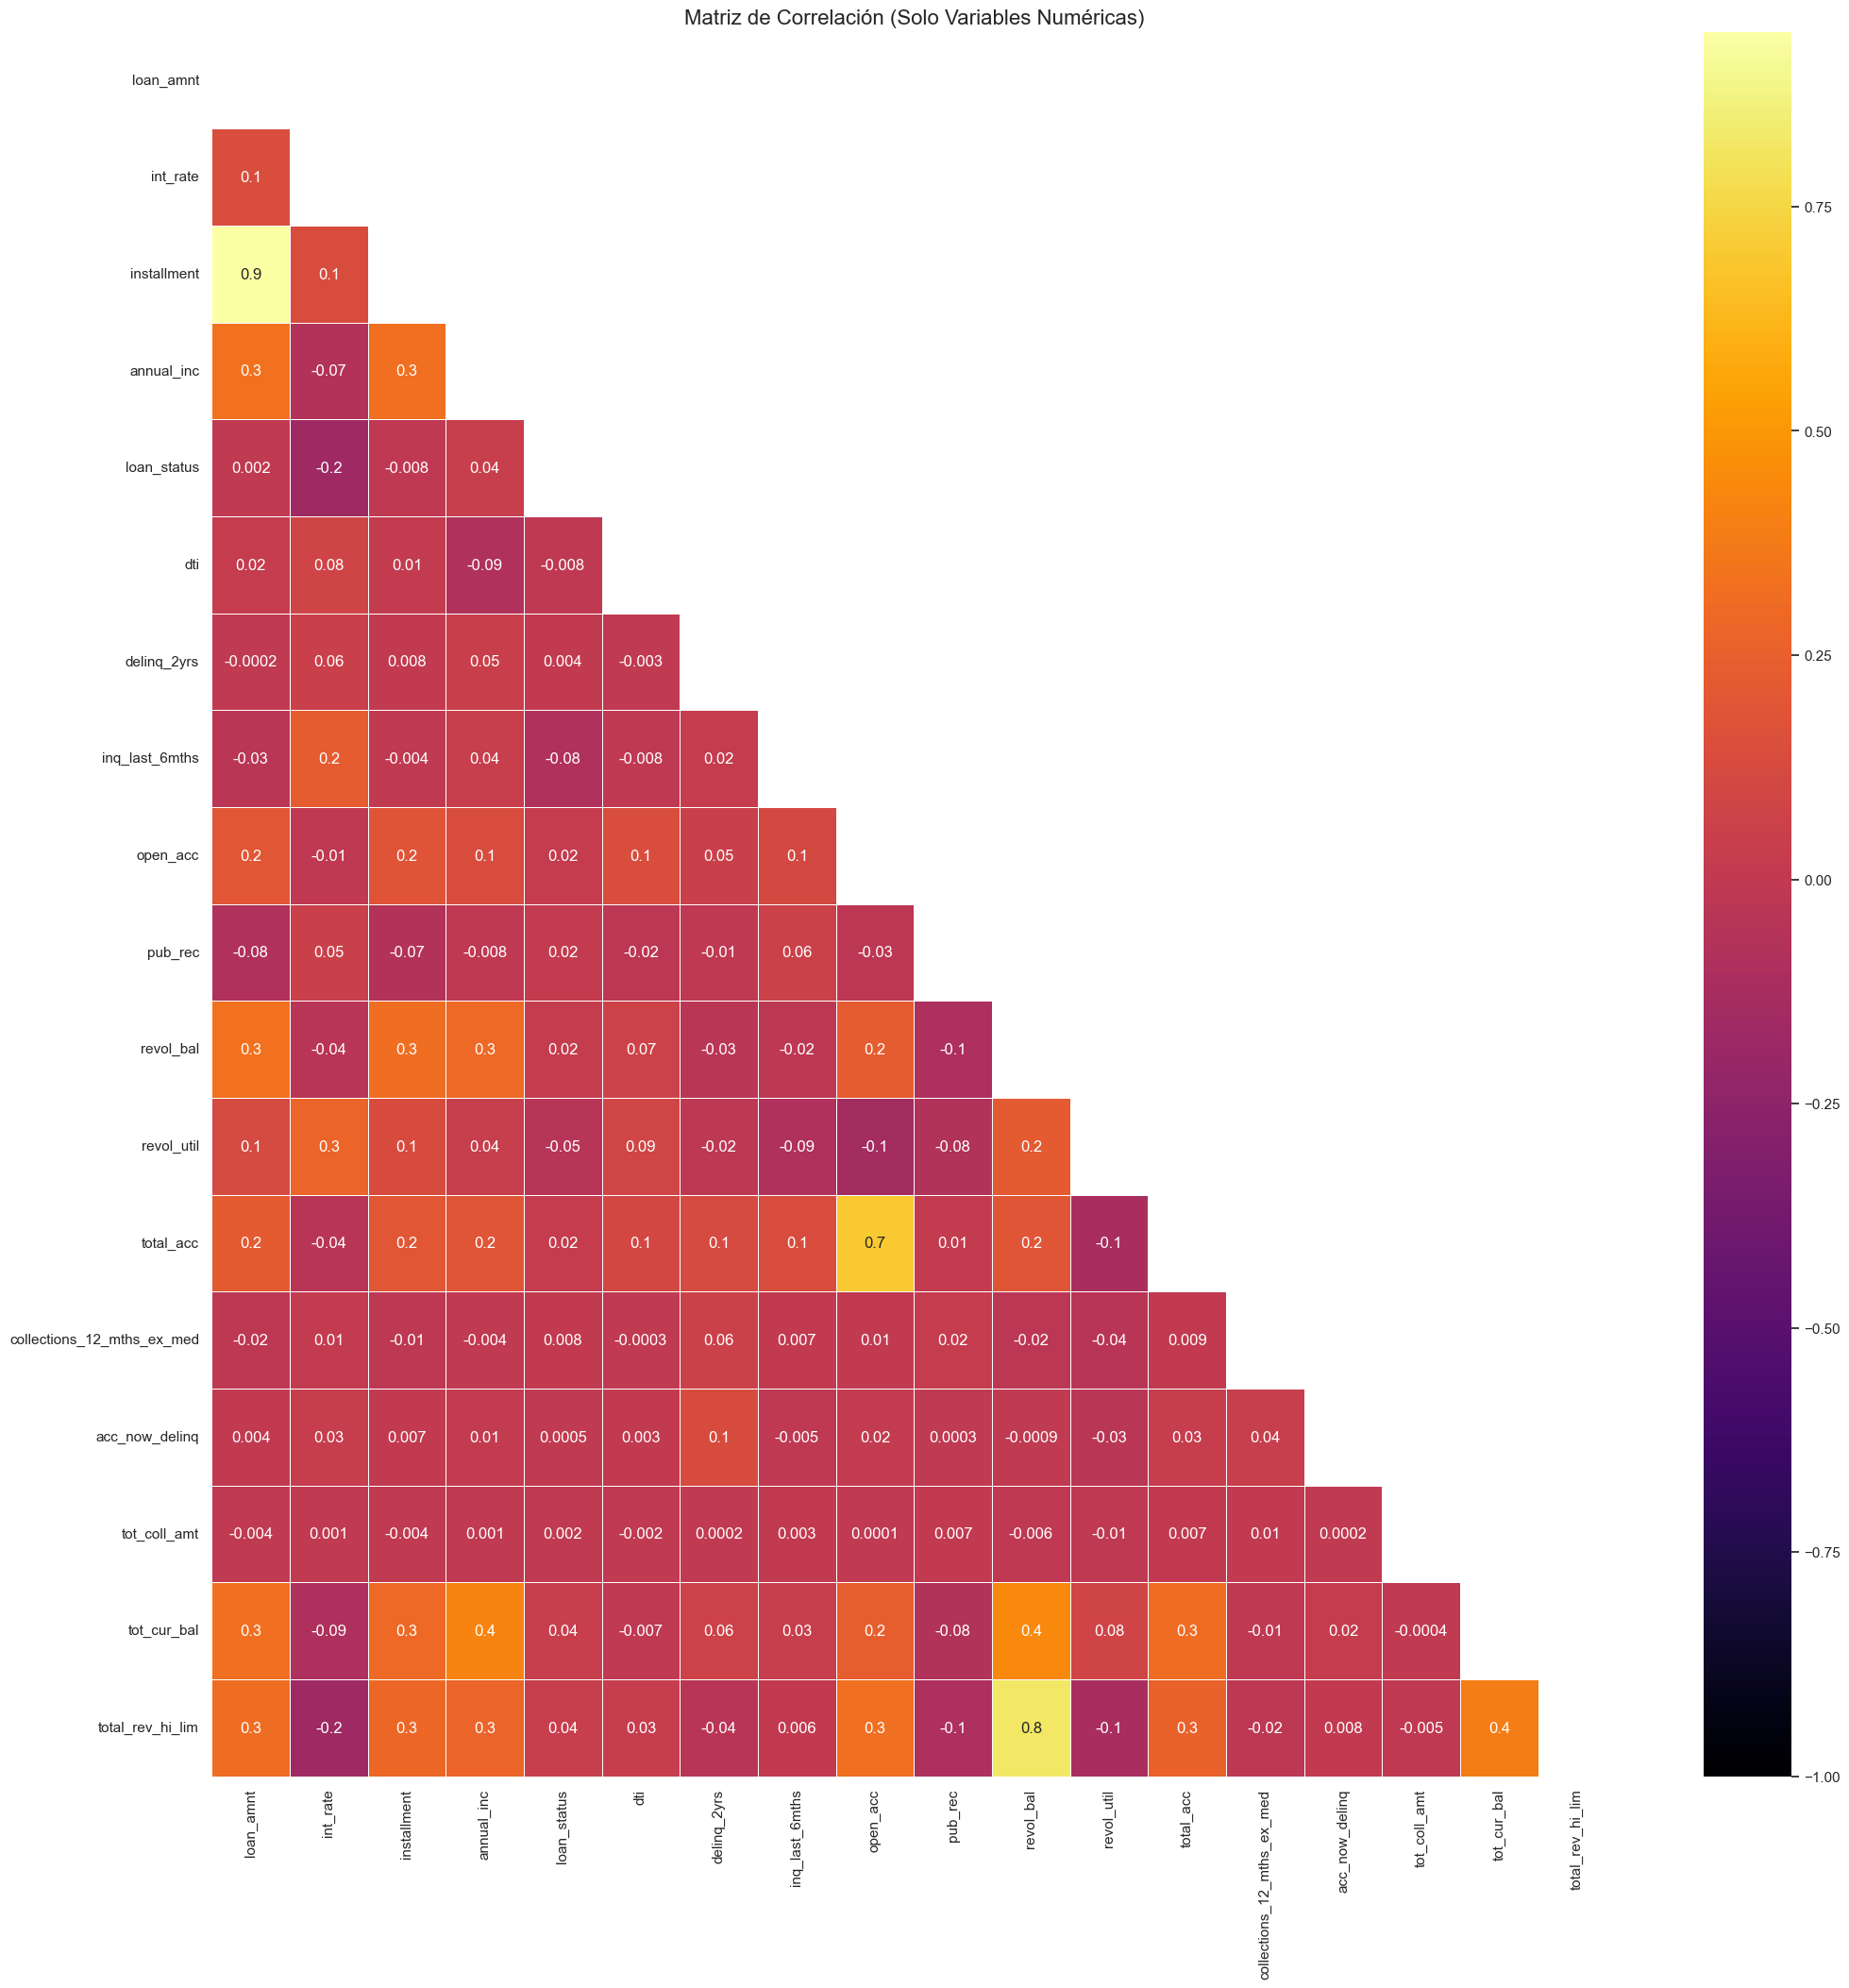

In [ ]:

## matriz de correlaciones
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Crear la matriz de correlación
corr_matrix = df_numeric.corr().fillna(0)

# Crear una máscara para ocultar la parte superior del mapa de calor
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Graficar el mapa de calor
plt.figure(figsize=(24, 24))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="inferno",
    vmin=-1,
    fmt='.1g',
    edgecolor='w',
    linewidth=0.6
)
plt.title('Matriz de Correlación (Solo Variables Numéricas)', fontsize=16)
plt.show()


se eliminarán aquellas columnas que posean un correlación de al menos 60% y se dejará aquella que tenga más correlación con el target es decir las variables:

In [ ]:
 # se eliminarán aquellas columnas que posean un correlación de al menos 60% es decir las variables:



df.drop(columns=['total_acc', 'total_rev_hi_lim'], inplace=True)

In [ ]:
df.shape ## ahora quedan 29 columnas

(887379, 29)

In [ ]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal'],
      dtype='object')


In [ ]:

df.drop(columns=['earliest_cr_line', 'issue_d','initial_list_status'], inplace=True)

In [ ]:
df.shape

(887379, 26)

In [ ]:
## Rellenar los valores en los que los clientes no especificaron su trabajo pero si el tiempo en el

print("Categorías diferentes:", df["emp_title"].nunique())
print("Numero de N/A:", df["emp_title"].isna().sum())
print("Numero de clientes que clientes no especificaron su trabajo pero si el tiempo en el:",
      df[(df['emp_length'].notnull()) & (df['emp_title'].isnull())].shape[0])

# Imputarles la expresion off the books que es trabajo informal o no oficial
df['emp_title'] = df.apply(lambda row: 'off the books' if pd.notnull(row['emp_length']) and pd.isnull(row['emp_title']) else row['emp_title'], axis=1)

Categorías diferentes: 299273
Numero de N/A: 0
Numero de clientes que clientes no especificaron su trabajo pero si el tiempo en el: 0


Verificar que aquellos valores nulos de aquellos que no especificaron el trabajo posiblemente tengan valores nulos en el "emp_lenght" y la razón sea porque no trabajan.

In [ ]:
df["emp_title"] = df["emp_title"].fillna("Does not work")
no_trabajan = df[df["emp_title"]=="Does not work"]["emp_length"]
no_trabajan.shape
print(no_trabajan.value_counts())
print("Numero de datos N/A en aquellos que no trabajan", no_trabajan.isna().sum())
print("Numero de datos que no trabajan y tienen en su experiencia un valor diferente de nulo",
      no_trabajan[no_trabajan.notnull()].shape[0])

Series([], Name: count, dtype: int64)
Numero de datos N/A en aquellos que no trabajan 44436
Numero de datos que no trabajan y tienen en su experiencia un valor diferente de nulo 0


Como se confirmó el comportamiento que estabamos prediciendo en los datos podemos seguir y procesar la columna de experiencia y aplicarles el valor de -1 a los clientes que no trabajan para diferenciar y en caso de que el modelo encuentre una correlación positiva entre esta columna y el target penalizar un poco estos clientes.

Hacer una copia de la columna del trabajo para analisis posterior(creación de embeddings) , y se elimina de el dataframe original debido que si se realizara un one-hot incrementaría demasiado la dimensionalidad del problema.

In [ ]:
emp_title =df["emp_title"].copy()
df.drop(columns=['emp_title'], inplace=True)

In [ ]:
# convertir a numerica la columna emp_length ya que esta en string


def convertir(df, columna):
    df[columna] = df[columna].replace({
        r'\+ years': '',
        r' years': '',
        r' year': '',
        r'< 1': '0'
    }, regex=True)

    # Convertir a tipo numérico y asignar 0 donde haya valores faltantes
    df[columna] = pd.to_numeric(df[columna], errors='coerce').fillna(-1).astype(int)
print("Numero de datos con nulo en esta columna:", df["emp_length"].isnull().sum(), "siendo un",
      str(round(df["emp_length"].isnull().sum() / df.shape[0] * 100, 2)) + "%", "del total")
convertir(df, 'emp_length')
print(df['emp_length'].unique())


Numero de datos con nulo en esta columna: 44825 siendo un 5.05% del total
[10  0  1  3  8  9  4  5  6  2  7 -1]


In [ ]:
# converting term to numeric

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

term_numeric(df, 'term')

In [ ]:

## ELIMINAR application_type  Y PYMTN-PLAN ESTAN DESBALANCEADAS ESAS CLASES


df.drop(columns=['application_type', 'pymnt_plan'], inplace=True)

In [ ]:
## ver que tiene NA

df.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
purpose                           0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      502
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
dtype: int64

In [ ]:
## imputar valores nulos

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   term                        887379 non-null  int64  
 2   int_rate                    887379 non-null  float64
 3   installment                 887379 non-null  float64
 4   grade                       887379 non-null  object 
 5   sub_grade                   887379 non-null  object 
 6   emp_length                  887379 non-null  int32  
 7   home_ownership              887379 non-null  object 
 8   annual_inc                  887375 non-null  float64
 9   verification_status         887379 non-null  object 
 10  loan_status                 887379 non-null  int32  
 11  purpose                     887379 non-null  object 
 12  dti                         887379 non-null  float64
 13  delinq_2yrs   

In [ ]:
## imputar las numericas con la mediana

from sklearn.impute import SimpleImputer

# Select the numerical columns with missing values
h = df.select_dtypes(['float64', 'int64', 'int32']).isnull().sum()
columns  = h[h > 0].index

for column in columns:
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df[column] = imputer.fit_transform(pd.DataFrame(df[column]))



In [ ]:
df.isna().sum() ## ya no hay nulos

loan_amnt                              0
term                                   0
int_rate                               0
installment                            0
sub_grade                              0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
collections_12_mths_ex_med             0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_sta

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,0.0,1.0,3.0,0.0,13648.0,83.7,0.0,0.0,0.0,80559.0
1,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,0.0,5.0,3.0,0.0,1687.0,9.4,0.0,0.0,0.0,80559.0
2,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,0.0,2.0,2.0,0.0,2956.0,98.5,0.0,0.0,0.0,80559.0
3,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,0.0,1.0,10.0,0.0,5598.0,21.0,0.0,0.0,0.0,80559.0
4,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,...,0.0,0.0,15.0,0.0,27783.0,53.9,0.0,0.0,0.0,80559.0


In [ ]:
## se pasan las categoricas a dummies con one-hot encoding

from sklearn.preprocessing import OneHotEncoder

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Seleccionar las columnas categóricas
categorical_feature = ['home_ownership', 'verification_status','purpose']

# Aplicar el encoder a las columnas categóricas
encoded = encoder.fit_transform(df[categorical_feature])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_feature))

# Unir el DataFrame original con el codificado y eliminar las originales
df = pd.concat([df.drop(columns=categorical_feature), encoded_df], axis=1)










In [ ]:
letter_value = {
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1
}

number_value = {
    '1': 0.8,
    '2': 0.6,
    '3': 0.4,
    '4': 0.2,
    '5': 0.0
}
df['sub_grade'] = (
    df['sub_grade'].str[0].map(letter_value) +
    df['sub_grade'].str[1].map(number_value)
)
# No incluir la columna grade ya que está incluída en subgrade
df.drop(columns=['grade'], inplace=True)

In [ ]:
nombres_columnas = df.columns.tolist()

print(nombres_columnas)

['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding']


In [ ]:
import pandas as pd

# Lista de nombres de columnas
columnas = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length',
    'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'home_ownership',
    'purpose_wedding'
]

# Crear un DataFrame con una sola columna
df_columnas = pd.DataFrame(columnas, columns=['Nombre de Columna'])

# Aplicar estilos para agregar bordes alrededor de la tabla
df_columnas = df_columnas.style.set_table_styles(
    [{'selector': 'table',
      'props': [('border', '2px solid black')]},
     {'selector': 'th',
      'props': [('border', '1px solid black')]},
     {'selector': 'td',
      'props': [('border', '1px solid black')]}]
)

# Mostrar el DataFrame con bordes
df_columnas


,Nombre de Columna
0,loan_amnt
1,term
2,int_rate
3,installment
4,sub_grade
5,emp_length
6,annual_inc
7,loan_status
8,dti
9,delinq_2yrs


## Random Forest

Gracias a la alta interpretabilidad de los modelos basados en árboles se entrenaran modelos para ver el comportamiento de estos en los datos y además para verificar el impacto de las variables elegidas en el target y en caso de variables con poco impacto depurarlas

In [ ]:
## seleccionar las mejores variables por medio de un random forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = df.drop(columns=['loan_status'])  # Todas las columnas excepto 'loan_status'
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y,)




In [ ]:
print()

In [ ]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.ensemble import RandomForestClassifier



# Entrenamos un modelo RandomForest
#rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
#rf.fit(X_train, y_train)

# Extraemos la importancia de las características
#feature_importances = rf.feature_importances_

# Mostrar las características y sus importancias

#importance_df = pd.DataFrame({
#    'Feature': X.columns,
#    'Importance': feature_importances
#})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)
#print(importance_df)


In [ ]:
df["loan_status"].value_counts()

loan_status
1    828560
0     58819
Name: count, dtype: int64

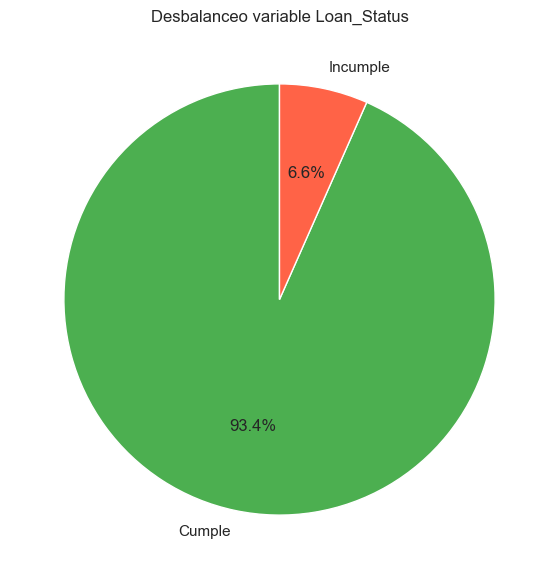

In [ ]:
import matplotlib.pyplot as plt

# Contamos los valores de 'loan_status' y calculamos el porcentaje
loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100

# Mapeamos los valores 1 y 0 a las etiquetas 'cumple' e 'incumple'
labels = ['Cumple' if label == 1 else 'Incumple' for label in loan_status_counts.index]

# Creamos el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(loan_status_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF6347'])
plt.title('Desbalanceo variable Loan_Status')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report


# Realizar predicciones en el conjunto de prueba
#y_pred = rf.predict(X_test)

# Generar la matriz de confusión
#cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()


#print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
#print(f"F1 Score: {f1_score(y_test, y_pred)}")
#print(f"Precision: {precision_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

Realizar un balanceo de clases por método de undersampling para ver su comportamiento. El undersampling solo se realizará en los datos de entrenamiento

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

rus = RandomUnderSampler(random_state=0)

# 3. Ajustar y transformar SOLO el conjunto de entrenamiento
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Entrenamos un modelo RandomForest
rf_rus = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
rf_rus.fit(X_train_rus, y_train_rus)

# Extraemos la importancia de las características
feature_importances_rus = rf_rus.feature_importances_

# Mostrar las características y sus importancias
importance_df_rus = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_rus
})
importance_df_rus = importance_df_rus.sort_values(by='Importance', ascending=False)
print(importance_df_rus)

# Definir el umbral que dean mayores a 0.005
threshold = 0.005

# Extraer las columnas seleccionadas en función de su importancia
no_selected_features = importance_df_rus[importance_df_rus['Importance'] < threshold]['Feature'].tolist()

print(no_selected_features)

                                Feature  Importance
2                              int_rate    0.142841
17                          tot_cur_bal    0.089588
7                                   dti    0.078249
12                            revol_bal    0.077197
13                           revol_util    0.076500
6                            annual_inc    0.075384
4                             sub_grade    0.075171
3                           installment    0.072481
0                             loan_amnt    0.060308
10                             open_acc    0.054188
5                            emp_length    0.041471
9                        inq_last_6mths    0.026264
16                         tot_coll_amt    0.016298
8                           delinq_2yrs    0.015244
11                              pub_rec    0.010651
24         verification_status_Verified    0.010116
26           purpose_debt_consolidation    0.009717
1                                  term    0.008824
23  verifica

In [ ]:
## se elminan las variable snuméricas con una importancia menor a 0.005 (la scategóricas no ya que la suma de la importancia es mayor a 0.005)

X_train_rus = X_train_rus.drop(columns=['acc_now_delinq' ,'collections_12_mths_ex_med'])

X_test=X_test.drop(columns=['acc_now_delinq' ,'collections_12_mths_ex_med'])

In [ ]:
## varaibles definitivas para el modelo en total 19

# Para X_train_rus
print("Columnas de X_train_rus:")
print(X_train_rus.columns)

# Para X_test
print("\nColumnas de X_test:")
print(X_test.columns)


Columnas de X_train_rus:
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'tot_coll_amt',
       'tot_cur_bal', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

Columnas de X_test:
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc'

Balanceando exactamente 1 a 1:
![image.png](attachment:image.png)

Accuracy: 0.6553843900020284
F1 Score: 0.7787412769559696
Precision: 0.972179819530128
              precision    recall  f1-score   support

           0       0.13      0.74      0.22     11764
           1       0.97      0.65      0.78    165712

    accuracy                           0.66    177476
   macro avg       0.55      0.69      0.50    177476
weighted avg       0.92      0.66      0.74    177476



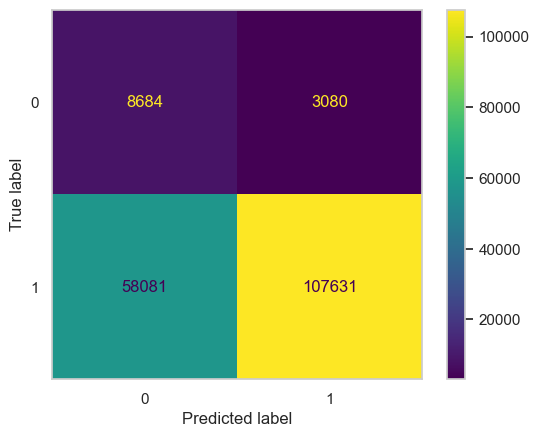

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report


# Realizar predicciones en el conjunto de prueba
y_pred_rus = rf_rus.predict(X_test)

# Generar la matriz de confusión
cm_rus = confusion_matrix(y_test, y_pred_rus)

# Mostrar la matriz de confusión
disp_rus = ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp_rus.plot()


print(f"Accuracy: {accuracy_score(y_test, y_pred_rus)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rus)}")
print(f"Precision: {precision_score(y_test, y_pred_rus)}")
print(classification_report(y_test, y_pred_rus))

In [ ]:
print(X_train.shape)

(709903, 38)


In [ ]:
print(X_train_rus.shape)
print(X_test.shape)

(94110, 36)
(177476, 36)


Forma de X_train_rus: (94110, 36)
Forma de X_test: (177476, 36)


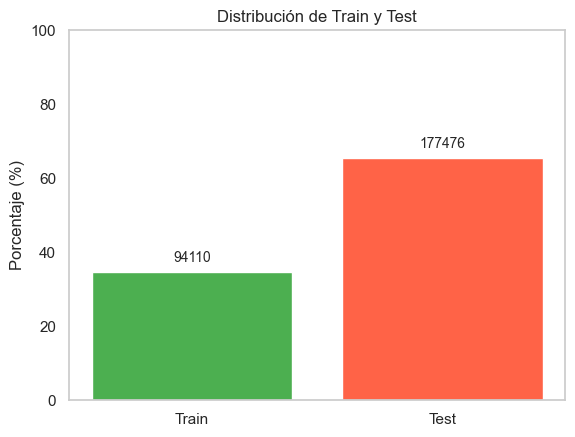

In [ ]:
import matplotlib.pyplot as plt

# Imprimir las formas de los conjuntos de datos
print("Forma de X_train_rus:", X_train_rus.shape)
print("Forma de X_test:", X_test.shape)

# Calcular los tamaños en porcentaje
train_size = X_train_rus.shape[0]
test_size = X_test.shape[0]
total_size = train_size + test_size

train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Crear el gráfico de barras
labels = ['Train', 'Test']
percentages = [train_percentage, test_percentage]
sizes = [train_size, test_size]

plt.bar(labels, percentages, color=['#4CAF50', '#FF6347'])
plt.title('Distribución de Train y Test')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Anotar los números sobre las barras
for i, size in enumerate(sizes):
    plt.text(i, percentages[i] + 2, str(size), ha='center', va='bottom', fontsize=10)

plt.show()



## Exploración de árbol utilizando OHE de "emp_title"

Crear un nuevo dataframe con la columna "emp_title", previamente había sido guardada al ser eliminada del dataframe original:

In [ ]:
print(len(emp_title))
print(df.shape)

887379
(887379, 39)


In [ ]:
cluster_labels = np.loadtxt('cluster_labels.csv', delimiter=',', skiprows=0).astype(int)

Leer los labels previamente calculados

In [ ]:
df_emp_hot = df.copy()
df_emp_hot["job_cluster"] = cluster_labels

In [ ]:
print(df_emp_hot.shape)
print(df.shape)

(887379, 40)
(887379, 39)


In [ ]:
df_emp_hot['job_cluster'] = cluster_labels
dummies = pd.get_dummies(df_emp_hot['job_cluster'], prefix='job_cluster')
df_emp_hot = pd.concat([df_emp_hot, dummies], axis=1)
df_emp_hot.drop('job_cluster', axis=1, inplace=True)

In [ ]:
X_hot = df_emp_hot.drop(columns=['loan_status'])  # Todas las columnas excepto 'loan_status'
y_hot = df_emp_hot['loan_status']


X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(X_hot, y_hot, test_size=0.2, random_state=0, stratify=y,)

In [ ]:
rus_hot = RandomUnderSampler(random_state=0)

# 3. Ajustar y transformar SOLO el conjunto de entrenamiento
X_train_rus_hot, y_train_rus_hot = rus_hot.fit_resample(X_train_hot, y_train_hot)

# Entrenamos un modelo RandomForest
rf_rus_hot = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
rf_rus_hot.fit(X_train_rus_hot, y_train_rus_hot)

# Extraemos la importancia de las características
feature_importances_rus_hot = rf_rus_hot.feature_importances_

# Mostrar las características y sus importancias
importance_df_rus_hot = pd.DataFrame({
    'Feature': X_hot.columns,
    'Importance': feature_importances_rus_hot
})
importance_df_rus_hot = importance_df_rus_hot.sort_values(by='Importance', ascending=False)
print(importance_df_rus_hot)

                     Feature  Importance
2                   int_rate    0.129519
17               tot_cur_bal    0.074614
4                  sub_grade    0.070093
7                        dti    0.067847
6                 annual_inc    0.067457
..                       ...         ...
15            acc_now_delinq    0.000638
34  purpose_renewable_energy    0.000228
27       purpose_educational    0.000129
20      home_ownership_OTHER    0.000086
19       home_ownership_NONE    0.000006

[68 rows x 2 columns]


Accuracy: 0.6557337330117875
F1 Score: 0.7789607730349436
Precision: 0.9724854342622284
              precision    recall  f1-score   support

           0       0.13      0.74      0.22     11764
           1       0.97      0.65      0.78    165712

    accuracy                           0.66    177476
   macro avg       0.55      0.70      0.50    177476
weighted avg       0.92      0.66      0.74    177476



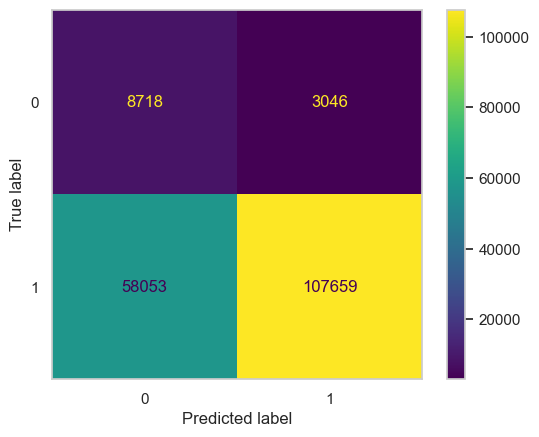

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_rus_hot = rf_rus_hot.predict(X_test_hot)

# Generar la matriz de confusión
cm_rus_hot = confusion_matrix(y_test_hot, y_pred_rus_hot)

# Mostrar la matriz de confusión
disp_rus_hot = ConfusionMatrixDisplay(confusion_matrix=cm_rus_hot)
disp_rus_hot.plot()


print(f"Accuracy: {accuracy_score(y_test_hot, y_pred_rus_hot)}")
print(f"F1 Score: {f1_score(y_test_hot, y_pred_rus_hot)}")
print(f"Precision: {precision_score(y_test_hot, y_pred_rus_hot)}")
print(classification_report(y_test_hot, y_pred_rus_hot))

In [ ]:
df_emp_hot.shape

(887379, 69)

Se ve un pequeño incremento por lo que no se puede decir que está aportando demasiado al modelo además se eligió un numero de clusters no muy alto e incrementa la dimension de los datos a 69 columnas.

## Estrategias a realizar.

In [ ]:
df["loan_status"].value_counts()

loan_status
1    828560
0     58819
Name: count, dtype: int64

Se evidencia el alto desbalance que hay en el target y que al realizar un balanceo obtenemos un mejor resultado en detectar aquellos clientes que pueden incurrir en un impago(Valor de Recall en label 0) siendo una perdida para el banco. Primero se obtuvieron métricas muy altas debido al balanceo desbalanceo del target ya que el modelo estaba en la gran mayoría de casos prediciendo el label 1 pero al realizar el balanceo de la clase por el método de under-sampling se obtuvieron mejores resultados sin embargo al realizarlo se tienen más datos de prueba que de entrenamiento.

Gracias a la gran cantidad de datos que se tienen en el dataset se puede realizar un undersampling y continuar teniendo un muy buen número de datos.

In [ ]:
df.shape

(887379, 39)

In [ ]:
columnas_seleccionadas = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
    'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'tot_coll_amt',
    'tot_cur_bal', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
    'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
    'verification_status_Source Verified', 'verification_status_Verified',
    'purpose_credit_card', 'purpose_debt_consolidation',
    'purpose_educational', 'purpose_home_improvement', 'purpose_house',
    'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
    'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
    'purpose_vacation', 'purpose_wedding'
]

X = df[columnas_seleccionadas]
Y= df['loan_status']


In [ ]:
rus_hot = RandomUnderSampler()

X_under, y_under = rus_hot.fit_resample(X, Y)

print(len(X_under), len(y_under))

117638 117638


In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0, stratify=y_under)

In [ ]:
# Entrenamos un modelo RandomForest
rf_under = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
rf_under.fit(X_train_under, y_train_under)

# Extraemos la importancia de las características
feature_importances_under = rf_under.feature_importances_

# Mostrar las características y sus importancias
importance_df_under = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_under
})
importance_df_under = importance_df_under.sort_values(by='Importance', ascending=False)
print(importance_df_under)


                                Feature  Importance
2                              int_rate    0.141049
17                          tot_cur_bal    0.088730
7                                   dti    0.078200
13                           revol_util    0.078017
12                            revol_bal    0.077065
6                            annual_inc    0.075720
4                             sub_grade    0.074980
3                           installment    0.072835
0                             loan_amnt    0.060970
10                             open_acc    0.054886
5                            emp_length    0.041810
9                        inq_last_6mths    0.026182
16                         tot_coll_amt    0.016323
8                           delinq_2yrs    0.015103
11                              pub_rec    0.010591
24         verification_status_Verified    0.010190
26           purpose_debt_consolidation    0.009776
23  verification_status_Source Verified    0.009004
1           

Accuracy: 0.6929615776946617
F1 Score: 0.6789333333333334
Precision: 0.7114381520119225
              precision    recall  f1-score   support

           0       0.68      0.74      0.71     11764
           1       0.71      0.65      0.68     11764

    accuracy                           0.69     23528
   macro avg       0.69      0.69      0.69     23528
weighted avg       0.69      0.69      0.69     23528



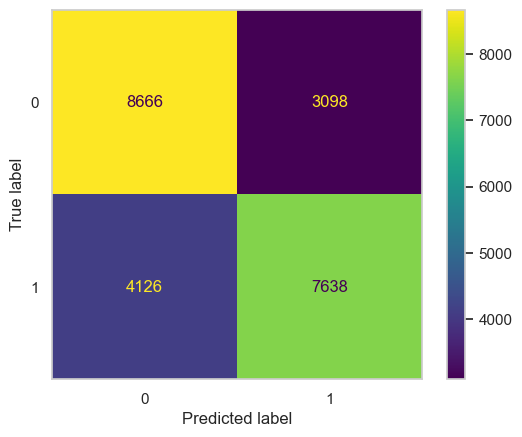

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_under = rf_under.predict(X_test_under)

# Generar la matriz de confusión
cm_under = confusion_matrix(y_test_under, y_pred_under)

# Mostrar la matriz de confusión
disp_under = ConfusionMatrixDisplay(confusion_matrix=cm_under)
disp_under.plot()


print(f"Accuracy: {accuracy_score(y_test_under, y_pred_under)}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_under)}")
print(f"Precision: {precision_score(y_test_under, y_pred_under)}")
print(classification_report(y_test_under, y_pred_under))

Al realizar el undersampling se tiene la siguiente cantidad de datos

In [ ]:
len(y_under)

117638

## Modelos de RNA

In [ ]:
df.shape

(887379, 39)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
arg = X_under.columns.tolist().index("tot_cur_bal")+1
# Elegir las columnas a escalar(No categóricas)
to_scale = X_under.columns.tolist()[:arg]
print(to_scale)

X_under[to_scale] = scaler.fit_transform(X_under[to_scale])

['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'tot_coll_amt', 'tot_cur_bal']


In [ ]:
# Temp para luego dividirr
X_train, X_temp, y_train, y_temp = train_test_split(
    X_under,
    y_under,
    test_size=0.30,    # 30% se destina a dividir entre validación y test
    random_state=0,   # Semilla para reproducibilidad
    shuffle=True       # Mezclamos aleatoriamente los datos antes de dividir
)


# 50% de X_temp se destinará a validación y 50% a test.
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,    # De ese 30%, la mitad (15%) para test
    random_state=0,
    shuffle=True
)

# Veamos la proporción real
print("Tamaño de X_train:", X_train.shape, " ->", len(X_train)/len(X))
print("Tamaño de X_val:  ", X_val.shape,   " ->", len(X_val)/len(X))
print("Tamaño de X_test: ", X_test.shape,  " ->", len(X_test)/len(X))


Tamaño de X_train: (82346, 36)  -> 0.0927968770953561
Tamaño de X_val:   (17646, 36)  -> 0.019885528055092583
Tamaño de X_test:  (17646, 36)  -> 0.019885528055092583


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def build_model(input_dim,
                n_hidden1=128,
                n_hidden2=64,
                n_hidden3=32,
                dropout_rate=0.3,
                l2_reg=0.0,
                learning_rate=0.001):

    model = models.Sequential()

    # Capa oculta 1
    model.add(layers.Dense(n_hidden1,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg),
                           input_shape=(input_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capa oculta 2
    model.add(layers.Dense(n_hidden2,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capa oculta 3
    model.add(layers.Dense(n_hidden3,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # Capa de salida (para binario)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compilación del modelo
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.AUC(name='auc')])
    return model


model = build_model(input_dim=36,
                    n_hidden1=128,
                    n_hidden2=64,
                    n_hidden3=32,
                    dropout_rate=0.3,
                    learning_rate=0.001)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=6,
                                                     restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping_cb],
                    verbose=1)




Epoch 1/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5923 - auc: 0.6256 - loss: 0.7135 - val_accuracy: 0.6577 - val_auc: 0.7146 - val_loss: 0.6186
Epoch 2/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6531 - auc: 0.7075 - loss: 0.6244 - val_accuracy: 0.6729 - val_auc: 0.7350 - val_loss: 0.6032
Epoch 3/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6742 - auc: 0.7329 - loss: 0.6052 - val_accuracy: 0.6803 - val_auc: 0.7486 - val_loss: 0.5918
Epoch 4/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6807 - auc: 0.7405 - loss: 0.5983 - val_accuracy: 0.6817 - val_auc: 0.7533 - val_loss: 0.5880
Epoch 5/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6868 - auc: 0.7493 - loss: 0.5916 - val_accuracy: 0.6912 - val_auc: 0.7569 - val_loss: 0.5847
Epoch 6/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6898 - auc: 0.7521 - loss: 0.5886 - val_accuracy: 0.6878 - val_auc: 0.7586 - val_loss: 0.5840
Epoch 7/50
1287/1287 ━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report


results = model.evaluate(X_test, y_test, verbose=0)
print("Loss en test:", results[0])
print("Accuracy en test:", results[1])
print("AUC en test:", results[2])

# Generar Predicciones Probabilísticas
y_pred_prob = model.predict(X_test, batch_size=64, verbose=0)

# Convertir Probabilidades a Etiquetas de Clase (umbral = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

# Generar y Mostrar el Reporte de Clasificación
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred, digits=4))

Loss en test: 0.5718615055084229
Accuracy en test: 0.6943783164024353
AUC en test: 0.7663116455078125

--- Classification Report ---

              precision    recall  f1-score   support

           0     0.6726    0.7438    0.7064      8724
           1     0.7206    0.6460    0.6813      8922

    accuracy                         0.6944     17646
   macro avg     0.6966    0.6949    0.6939     17646
weighted avg     0.6969    0.6944    0.6937     17646



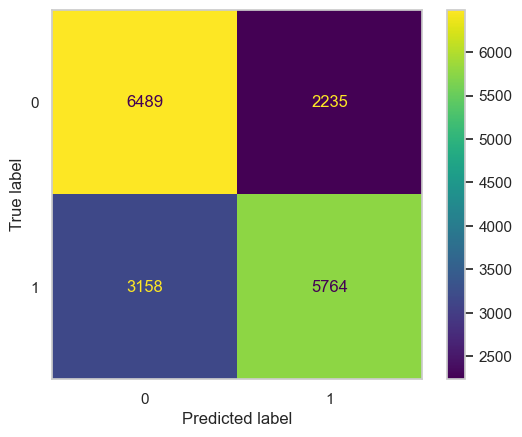

In [ ]:
cm_under = confusion_matrix(y_test, y_pred)
disp_under = ConfusionMatrixDisplay(confusion_matrix=cm_under)
disp_under.plot()

In [ ]:
## cambio de escala
# Convertir Probabilidades a la Escala del Scorecard
min_score = 300
max_score = 850
scorecard_scale = min_score + (max_score - min_score) * y_pred_prob.reshape(-1)

# Imprimir un ejemplo de la escala del scorecard
print("\n--- Ejemplo de Scores ---\n")
print(scorecard_scale[:10])  # Mostrar los primeros 10 scores



--- Ejemplo de Scores ---

[449.09726 429.78326 666.2761  405.98853 438.95386 661.31885 418.5333
 414.76645 481.38672 767.6304 ]


In [ ]:
## guardar el modelo con la escala correcta para el score

import pickle

class ScorecardModel:
    def __init__(self, base_model, min_score=300, max_score=850):
        self.base_model = base_model
        self.min_score = min_score
        self.max_score = max_score

    def predict(self, X):
        # Generar probabilidades con el modelo base
        probabilities = self.base_model.predict(X)
        # Escalar a la escala del scorecard
        scores = self.min_score + (self.max_score - self.min_score) * probabilities
        return scores

    def evaluate(self, X, y):
        return self.base_model.evaluate(X, y)

    def save(self, file_path):
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)


In [ ]:
# Envolver el modelo base en la clase personalizada
min_score = 300
max_score = 850
scorecard_model = ScorecardModel(model, min_score=min_score, max_score=max_score)

# Guardar el modelo con la transformación integrada
with open('scorecard_model.pkl', 'wb') as file:
    pickle.dump(scorecard_model, file)


In [ ]:
# Cargar el modelo
with open('scorecard_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Generar predicciones escaladas directamente
X_test_example = X_test[:5]  # Usar un subconjunto para el ejemplo
predicted_scores = loaded_model.predict(X_test_example)

print("\n--- Scores del Scorecard ---\n")
print(predicted_scores)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

--- Scores del Scorecard ---

[[449.09726]
 [429.78326]
 [666.2761 ]
 [405.98853]
 [438.95386]]


In [ ]:
import joblib

In [ ]:
import pickle
model.save("model.keras")  # En lugar de model.save("model.h5")


In [ ]:
import pickle
import tensorflow as tf

# Guardar el modelo en el formato recomendado (.keras)
model_path = "model.keras"
model.save(model_path)

# Guardar el historial de entrenamiento
data_to_save = {
    "model_file": model_path,  # Ruta al modelo guardado
    "history": history.history  # Historial de entrenamiento
}

# Guardar todo en un archivo pickle
with open("model_and_history.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

print("Modelo y datos de entrenamiento guardados exitosamente.")


Modelo y datos de entrenamiento guardados exitosamente.


In [ ]:
# Leer los embeddings de los trabajos
reduced_embeddings = np.loadtxt('reduced_embeddings.csv', delimiter=',', skiprows=0)

In [ ]:
rus = RandomUnderSampler(random_state=0)
df_emp = df.copy()
df_emp = pd.concat([df, pd.DataFrame(reduced_embeddings, columns=["Embedding " + str(i) for i in range(reduced_embeddings.shape[1])])], axis=1)
X_emp = df_emp.drop(columns=["loan_status"]).copy()
y_emp = df_emp["loan_status"].copy()
X_emp, y_emp = rus.fit_resample(X_emp, y_emp)

# Escalar
scaler =StandardScaler()
X_emp[to_scale] = scaler.fit_transform(X_under[to_scale])
print(y_emp.shape)

(117638,)


In [ ]:
# Temp para luego dividirr
X_train_emp, X_temp_emp, y_train_emp, y_temp_emp = train_test_split(
    X_emp,
    y_emp,
    test_size=0.30,    # 30% se destina a dividir entre validación y test
    random_state=0,   # Semilla para reproducibilidad
    shuffle=True       # Mezclamos aleatoriamente los datos antes de dividir
)


# 50% de X_temp se destinará a validación y 50% a test.
X_val_emp, X_test_emp, y_val_emp, y_test_emp = train_test_split(
    X_temp_emp,
    y_temp_emp,
    test_size=0.50,    # De ese 30%, la mitad (15%) para test
    random_state=0,
    shuffle=True
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def build_model(input_dim, n_hidden1=128, n_hidden2=64, n_hidden3=32, dropout_rate=0.3, l2_reg=0.0, learning_rate=0.001):
    model = models.Sequential()
    model.add(layers.Dense(n_hidden1, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), input_shape=(input_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(n_hidden2, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(n_hidden3, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


# Construir y revisar el modelo
model_emp = build_model(input_dim=78)
model_emp.summary()

# Entrenar el modelo
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = model_emp.fit(X_train_emp, y_train_emp,
                        validation_data=(X_val_emp, y_val_emp),
                        epochs=50,
                        batch_size=64,
                        callbacks=[early_stopping_cb],
                        verbose=1)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 128)            │        10,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,377 (83.50 KB)

 Trainable params: 20,929 (81.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6117 - auc: 0.6494 - loss: 0.6968 - val_accuracy: 0.6766 - val_auc: 0.7404 - val_loss: 0.5990
Epoch 2/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6739 - auc: 0.7323 - loss: 0.6066 - val_accuracy: 0.6815 - val_auc: 0.7478 - val_loss: 0.5919
Epoch 3/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6854 - auc: 0.7455 - loss: 0.5951 - val_accuracy: 0.6825 - val_auc: 0.7541 - val_loss: 0.5870
Epoch 4/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6897 - auc: 0.7509 - loss: 0.5901 - val_accuracy: 0.6905 - val_auc: 0.7578 - val_loss: 0.5838
Epoch 5/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6920 - auc: 0.7535 - loss: 0.5872 - val_accuracy: 0.6928 - val_auc: 0.7593 - val_loss: 0.5818
Epoch 6/50
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6929 - auc: 0.7570 - loss: 0.5843 - val_accuracy: 0.6936 - val_auc: 0.7624 - val_loss: 0.5779
Epoch 7/50
1287/1287 ━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report

results_emp = model.evaluate(X_test, y_test, verbose=0)
print("Loss en test:", results_emp[0])
print("Accuracy en test:", results_emp[1])
print("AUC en test:", results_emp[2])

# Generar Predicciones Probabilísticas
y_pred_prob_emp = model.predict(X_test_emp, batch_size=64, verbose=0)

# Convertir Probabilidades a Etiquetas de Clase (umbral = 0.5)
y_pred_emp = (y_pred_prob_emp >= 0.5).astype(int).reshape(-1)

# Generar y Mostrar el Reporte de Clasificación
print("\n--- Classification Report ---\n")
print(classification_report(y_test_emp, y_pred_emp, digits=4))

NameError: name 'X_test_emp' is not defined

## Creación de embeddings de "emp_title" y almacenarlos para solo realizar ésta operación una vez.

In [ ]:
#!pip install tf-keras
error para no ejecutar
!pip install sentence-transformers


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df_emp = df.copy()
df_emp["emp_title"] = emp_title

In [ ]:
from sentence_transformers import SentenceTransformer
df_emp = df
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
job_texts = df_emp["emp_title"].astype(str).tolist()  # Convertir a string por seguridad
job_embeddings = model.encode(job_texts, show_progress_bar=True)

KeyError: 'emp_title'

In [ ]:
# Guarda el array en un archivo CSV
np.savetxt('emp_embeddings.csv', job_embeddings, delimiter=',')

In [ ]:
job_embeddings_16 = job_embeddings.astype(np.float16)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40, random_state=0)
reduced_embeddings = pca.fit_transform(job_embeddings)


In [ ]:
from sklearn.cluster import KMeans

k = 30  # Número de clusters a probar
kmeans = KMeans(n_clusters=30, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_embeddings)


In [ ]:
#np.savetxt('reduced_embeddings.csv', reduced_embeddings, delimiter=',')

In [ ]:
#np.savetxt('cluster_labels.csv', cluster_labels, delimiter=',')

In [ ]:
reduced_embeddings[:5]

array([[-1.23159967e-01,  1.90271303e-01,  8.48387927e-03,
         2.66609699e-01,  1.14825651e-01,  5.51257879e-02,
         1.79011136e-01, -1.18448295e-01, -3.32358256e-02,
         1.78166255e-01,  2.24455409e-02,  8.82467702e-02,
         2.94634700e-01, -1.92078397e-01,  7.99093693e-02,
        -4.84497473e-03,  4.05058235e-01,  3.95724289e-02,
         1.65959463e-01, -9.82797965e-02, -2.87119061e-01,
         2.80426800e-01, -5.22667393e-02, -2.70046413e-01,
        -8.19320157e-02, -1.36574283e-01,  4.52548936e-02,
        -9.70171914e-02,  3.13175395e-02, -3.79643440e-02,
         8.68811086e-02,  5.96571676e-02, -4.57627550e-02,
         1.62789393e-02, -3.84966135e-02,  1.14542618e-01,
        -1.04781389e-01, -6.83832727e-03, -1.41865425e-02,
         9.13297310e-02],
       [-1.14693768e-01,  1.30444422e-01, -2.27898583e-02,
         2.11004734e-01,  1.37827560e-01,  5.55618554e-02,
         3.40807438e-03,  3.99449915e-02,  6.47933409e-03,
        -6.41371757e-02,  6.52

## Procedimientos con Raw para incluir en el main

In [ ]:
print(df_raw.shape)
df_raw["emp_title"].nunique()


(887379, 74)


299271

In [ ]:
df_raw[(df_raw['emp_length'].notnull()) & (df_raw['emp_title'].isnull())].shape

(7026, 74)

In [ ]:
df_raw['emp_title'] = df_raw.apply(lambda row: 'off the books' if pd.notnull(row['emp_length']) and pd.isnull(row['emp_title']) else row['emp_title'], axis=1)

In [ ]:
df_raw["emp_length"].isnull().sum()

44825

In [ ]:
df_raw[(df_raw['emp_length'].isnull()) & (df_raw['total_rev_hi_lim'].isnull())].shape

(2061, 74)

In [ ]:
convertir(df_raw, 'emp_length')

In [ ]:
df_raw['emp_title'].isna().sum()

In [ ]:
df_raw[df_raw['emp_title'].isnull()]["id"]

In [ ]:
letter_value = {
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1
}

number_value = {
    '1': 0.8,
    '2': 0.6,
    '3': 0.4,
    '4': 0.2,
    '5': 0.0
}
df_raw['sub_grade'] = (
    df_raw['sub_grade'].str[0].map(letter_value) +
    df_raw['sub_grade'].str[1].map(number_value)
)

In [ ]:
df_raw["sub_grade"]

In [ ]:
print(df_raw.groupby("loan_status"))

In [ ]:
# Si deseas calcular la proporción de N/A por cada categoría en el target
proporcion_na_por_target = df_raw.groupby("loan_status")["emp_title"].apply(lambda col: col.isna().sum() / len(col))
print(df_raw["emp_title"].isna().sum())
# Mostrar el resultado
print("\nProporción de valores N/A en la columna 'x' por target:")
print(proporcion_na_por_target)

In [ ]:
# Crea una lista con los nombres de las columnas a eliminar
columnas_a_eliminar = [f'job_cluster_{i}' for i in range(50)]

# Elimina las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [ ]:
df[df["loan_status"]==0].shape

In [ ]:
proporcion_na_por_target = df_raw.groupby("loan_status")["emp_title"].apply(lambda col: col.isna().sum() / len(col))

In [ ]:
print(df_emp.drop(columns=["loan_status"], axis=1) )

        loan_amnt        term  int_rate  installment grade sub_grade  \
0          5000.0   36 months     10.65       162.87     B        B2   
1          2500.0   60 months     15.27        59.83     C        C4   
2          2400.0   36 months     15.96        84.33     C        C5   
3         10000.0   36 months     13.49       339.31     C        C1   
4          3000.0   60 months     12.69        67.79     B        B5   
...           ...         ...       ...          ...   ...       ...   
887374    10000.0   36 months     11.99       332.10     B        B5   
887375    24000.0   36 months     11.99       797.03     B        B5   
887376    13000.0   60 months     15.99       316.07     D        D2   
887377    12000.0   60 months     19.99       317.86     E        E3   
887378    20000.0   36 months     11.99       664.20     B        B5   

        emp_length home_ownership  annual_inc verification_status  ...  \
0               10           RENT     24000.0            Veri